<a id="top"></a>
# **6.2 Frictional pullout and energy dissipation**
[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=633308)&nbsp;part 1

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

The energy evaluation procedure described in notebook [6.1](../tour6_energy/6_1_energy_dissipation.ipynb#top) is applicable to any boundary value problem. In this notebook, we apply it to the pullout of elastic bar, rigid matrix and frictional interface behavior.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

The analytical solution of the pullout test provides a suitable model to demonstrate the evaluation of the energy dissipation within an initial boundary value problem with including an inelastic deformation. 
The frictional bond exhibits a purely dissipative behavior with no elastic deformation included. On the other hand, the fiber represents a purely elastic behavior able to recover all the deformation upon unloading. We will use this configuration to evaluate the total, stored and dissipated energy in two ways. First we will use the concept presented in notebook [6.1](6_1_energy_dissipation.ipynb#top). Then, we will show a more efficient way employing directly the inelastic deformation with the corresponding stress components.

In [1]:
%matplotlib widget
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

# **Recap of the analytical solution of the pullout model** 

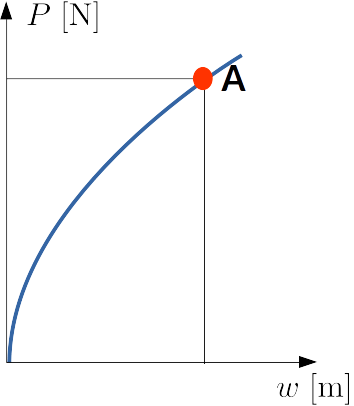
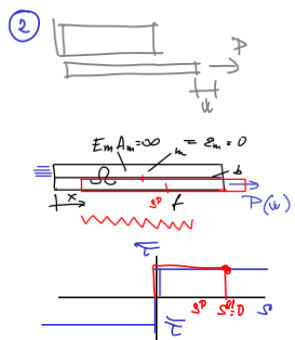
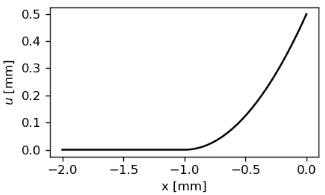

In [Tour 2](../index.ipynb#tour2) we derived an analytical solution of the pullout model [PO_LEF_LRM](../tour2_constant_bond/2_1_1_PO_observation.ipynb#PO_LEM_LRM_summary.ipynb) which delivers the square root function as the pullout curve

<a id="pullout_w"></a>
$$
P = \sqrt{2 p E_\mathrm{f} A_\mathrm{f} \bar{\tau} w}
$$
and the quadratic profile of displacement at a given level of load
<a id="u_f"></a>
$$
u_\mathrm{f}(P, x) = \frac{P^{2}}{2 A_\mathrm{f} E_\mathrm{f} \bar{\tau} p} + \frac{P x}{A_\mathrm{f} E_\mathrm{f}} + \frac{\bar{\tau} p x^{2}}{2 A_\mathrm{f} E_\mathrm{f}}, \; x \in (a,0)
$$

The fiber deforms only within the debonded length $x \in (a,0)$. The variable $a$ is obtained by realizing that the pullout force is distributed evenly over the debonded zone, i.e.
\begin{align}
a = -\frac{P}{p \bar{\tau}}
\end{align}

To be able to verify the derivation below of energy evaluation provided below, let us retype these equations in `sympy` 

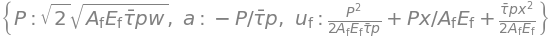

In [2]:
# symbol definition
E_f, A_f, tau, p = sp.symbols(r'E_\mathrm{f}, A_\mathrm{f}, \bar{\tau}, p')
x, w = sp.symbols('x, w')
P, u_f, a  = sp.symbols(r'P, u_\mathrm{f}, a')
eps_f, sig_f = sp.symbols(r'\varepsilon_\mathrm{f}, \sigma_\mathrm{f}')
# expressions
P_w_ = sp.sqrt(2*p*E_f*A_f*tau*w)
u_f_ = P**2 / (2*A_f*E_f*tau*p) + P*x / (A_f * E_f) + tau*p*x**2 / (2*A_f*E_f)
a_ = -P / (p*tau) 
{P:P_w_, u_f:u_f_, a:a_}

**Representative boundary value problem:** Using these three equations we can completely describe the strain and stress state of the pullout problem for a given value of the control displacement $w$. These three equations represents a solution of a boundary value problem needed to evaluate energy supply, stored energy and energy dissipation. The energy evaluations made below can be performed with any solved boundary value problem, no matter if the solution was obtained using analytical solutions or finite-element numerical solvers.

# **Global evaluation of dissipated energy**

## **Work supply $\mathcal{W}$**

Energy supplied to a pullout test controlled by the displacement $w$ 
associated with the measured force $P$ is evaluated by integrating the force over the control displacement $w$
$$
\mathcal{W}_w = \int_0^w P(w) \, \mathrm{d}w.
$$

In case of the pullout test, the energy needed to achieve a pullout displacement $w$ can be derived by substituting to the pullout curve into the above integral to obtain the result

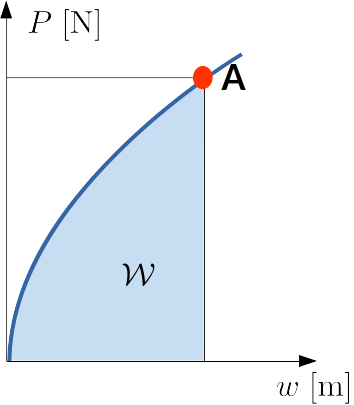

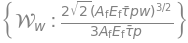

In [3]:
W_w = sp.symbols(r'\mathcal{W}_w')
W_w_ = sp.integrate(P_w_,w)
{W_w:W_w_}

## **Stored energy $\mathcal{U}$** 

The stress and slip distributions along the bond zone are not uniform anymore so that we need to evaluate the  stored energy by integrating over the whole bond length.
The evaluation of the stored energy for generally nonlinear material behavior involved in the pullout test is obtained as the sum of integrals of elastic energy contributions from the matrix, the reinforcement and the interface, i.e.
\begin{align}
    \label{eq:stored_energy_pullout}
\mathcal{U}
=
\frac{1}{2}
\int_{\Omega_\mathrm{m}}
\sigma_\mathrm{m}(x)
\varepsilon^\mathrm{el}_\mathrm{m}(x)
\;
\mathrm{d}x
+
\frac{1}{2}
\int_{\Omega_\mathrm{f}}
\sigma_\mathrm{f}(x)
\varepsilon_\mathrm{f}^\mathrm{el}(x)
\;
\mathrm{d}x
+
\frac{1}{2}
\int_{\Omega_\mathrm{mf}}
\tau_\mathrm{mf}(x)
s^\mathrm{el}_\mathrm{mf}(x)
\;
\mathrm{d}x.
\end{align}

This equation is valid for any kind of material behavior ascribed to the matrix, reinforcement or to the bond zone (damage or plasticity), (softening or hardening). 
Its evaluation may be regarded as counting of intact, undamaged material links/spring in every single material point in matrix, reinforcement and along the bond zone.

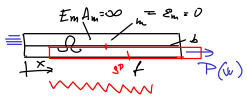
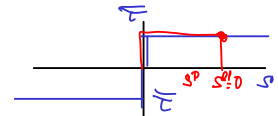

For considered case with elastic fiber, rigid matrix and frictional bond-slip behavior presented in [Tour 2](../index.ipynb#tour2), the stored energy evaluation can be simplified
Since the only elastic deformation occurs in the fiber the integration over the bond zone and matrix can be omitted. The elastic strain in the fiber is obtained by differentiating the fiber [displacement profile](#u_f) with respect to the spatial coordinate $x$ along the bond zone, i.e.
<a id="strain_f"></a>
\begin{align}
\varepsilon_\mathrm{f}(P, x) =
\frac{P}{A_\mathrm{f} E_\mathrm{f}} + \frac{\bar{\tau} p x}{A_\mathrm{f} E_\mathrm{f}}, \; x \in (a,0)
\end{align}
The corresponding stress is given as
<a id="stress_f"></a>
$$
\sigma_\mathrm{f} = E_\mathrm{f} \varepsilon_\mathrm{f}.
$$

The fiber stress and strain profiles exemplified for the values of $P=1, E_\mathrm{f}=1, A_\mathrm{f}=1, \bar{\tau}=1, p=1$ have the following form:

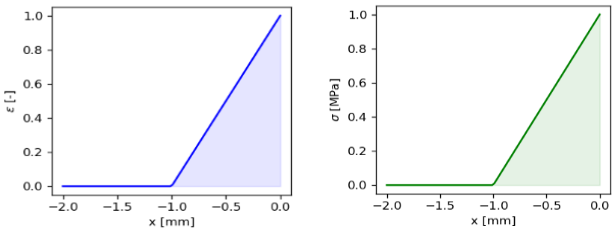

In [4]:
eps_f_ = u_f_.diff(x) # strain - differentiate the displacement profile
sig_f_ = E_f * eps_f_ # stress apply the elastic constitutive relation
{eps_f:eps_f_, sig_f:sig_f_}

Since the fiber is assumed elastic, i.e. $\varepsilon_\mathrm{f}^\mathrm{el} = \varepsilon_\mathrm{f}$ within the debonded zone, we can directly evaluate the stored energy as an integral over the bond zone multiplied with the fiber cross-sectional area $A_\mathrm{f}$ as
$$
\mathcal{U} = \frac{1}{2} A_\mathrm{f} \int_a^0 \sigma_\mathrm{f} 
\varepsilon_\mathrm{f}  \, \mathrm{d}x.
$$
By substituting for [fiber strain](#strain_f) and [stress](#stress_f) variables and after rearranging terms we obtain the stored energy as a function of the load $P$
\begin{align}
\mathcal{U}(P) &= 
\frac{P^{3}}{6 A_\mathrm{f} E_\mathrm{f} \bar{\tau} p}
\end{align}

To relate the stored energy to the control pullout displacement $w$ let us substitute the [pullout curve $P(w)$](#pullout_w) for the pullout force, delivering the final result
\begin{align}
\mathcal{U}(w) &= 
\frac{\sqrt{2}}{3} \cdot \sqrt{E_\mathrm{f} A_\mathrm{f} p\bar{\tau}}
\cdot w^{\frac{3}{2}}.
\end{align}

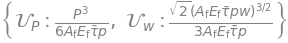

In [5]:
U_P, U_w = sp.symbols(r'\mathcal{U}_P, \mathcal{U}_w')
U_P_ = sp.simplify( sp.Rational(1,2) * A_f * sp.integrate(sig_f_ * eps_f_, (x,a_,0)) )
U_w_ = U_P_.subs(P,P_w_) # substitute the pullout curve
{U_P:U_P_, U_w:U_w_}

<div style="background-color:lightgray;text-align:left"> <img src="../icons/remark.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Remark - purely inelastic interface behavior</b> </div> 
Note that the constant bond-slip law implies that there is no elastic deformation and, thue, the energy stored in the bond layer is zero. The slip along the interface represents a purely plastic, irreversible deformation.

<a id="bond_slip_law"></a>
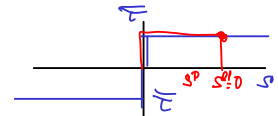

## **Released energy $G$**

<a id="pullout_energies"></a>
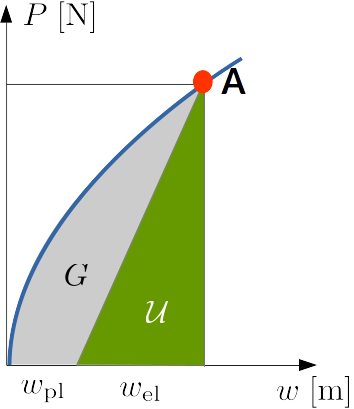
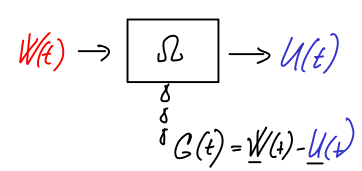

The released energy is obtained as the difference between the supplied and stored energies
$$
G = \mathcal{W} - \mathcal{U}
$$

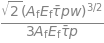

In [6]:
G_w_global = sp.simplify(W_w_ - U_w_)
G_w_global

By comparing this expression with the expression for stored energy and dissipated energyes are equivalent. This comes by chance and does not represent any objective result.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/question_puzzle.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Side remark 1: if we know the stored energy, we can derive the plastic slip</b> </div> 
In the analytical model at hand, we have two distinct material components, one elastic and one purely plastic. There is either elastic unloading in the fiber or ideally plastic unloading in the interface. These unloading characteristics are local to a material point. The determined amount of stored energy is a global structural property. We can use it to determine the linear unloading branch be realizing that the global elastic energy is given as
$$
U = \frac{1}{2} P w_\mathrm{el}
$$
where $w_\mathrm{el}$ represents the recoverable pullout displacement upon the force release, which is equal to

\begin{align}
w_\mathrm{el} = \frac{2U}{P}
= 
\frac{2 \sqrt{2} \cdot \sqrt{E_\mathrm{f} A_\mathrm{f} p \bar{\tau} } }
{3 \sqrt{2} \cdot \sqrt{E_\mathrm{f} A_\mathrm{f} p \bar{\tau} }}
\cdot \frac{w^\frac{3}{2}}{w^\frac{1}{2}} = \frac{2}{3} w.
\end{align}

This result is depicted in the [figure above](#pullout_energies) showing that the relation between the stored and released energies can be used to decompose the total control displacement into the recoverable and plastic parts, i.e.
\begin{align}
 w_\mathrm{el} = \frac{2}{3} w, \;\;\; w_\mathrm{pl} &= \frac{1}{3} w
\end{align}

<div style="background-color:lightgray;text-align:left"> <img src="../icons/question_puzzle.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Side remark 2: what is the value of unloading stiffness?</b> </div> 

By evaluating the ration between the force level and elastic displacement we can evaluate the instantaneous value of unloading stiffness at any stage of loading, i.e.

\begin{align}
 K = \frac{P}{w_\mathrm{el}} = \frac{3\sqrt{2}}{2} \cdot \sqrt{E_\mathrm{f}A_\mathrm{f}p\bar{\tau}}
 \cdot    \frac{1}{\sqrt{w}}
\end{align}
To verify this result, let us use `sympy` expressions and symbols defined above

In [7]:
K_w_ = P_w_ / (sp.Rational(2,3)*w)
K_w_

# **Local evaluation of dissipated energy**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=633308)&nbsp;part 2

In the above evaluation, the dissipated energy has been evaluated as a difference between the total supplied energy $\mathcal{W}$ and the elastic stored energy in the whole volume of the specimen $\mathcal{U}$, i.e.

$$
G = \mathcal{W} - \mathcal{U}
$$

However, this evaluation can be computationally expensive, since elastic deformation is distributed over the whole domain of a specimen. Therefore, an alternative evaluation of energy dissipation associated with inelastic deformation is more effective. This method is particularly important for the characterization of material behavior exhibiting softening.   

The evaluation of energies involves products of conjugate variables, e.g. displacement-force for work supply or strain-stress for elastic stored energy. In case of energy dissipated by a frictional interface, the energy released by a unit bond interface is given as the product $\tau s$. Thus, the dissipation by the whole interface reads

$$
G = p \int_{\Omega_\mathrm{diss}} \tau(s,x) s(x) \, \mathrm{d}x
$$

Let us evaluate this expression using the analytical solution of the pullout test. The inelastic deformation is represented by the slip variable $s$, which is equivalent to the fiber displacement $u_\mathrm{f}$. The corresponding conjugate stress variable inducing the energy dissipation is the bond stress $\tau = \bar{\tau}$.   

In an intermediate state of loading, the profile of bond stress and of the slip have a constant and quadratic shapes, respectively.

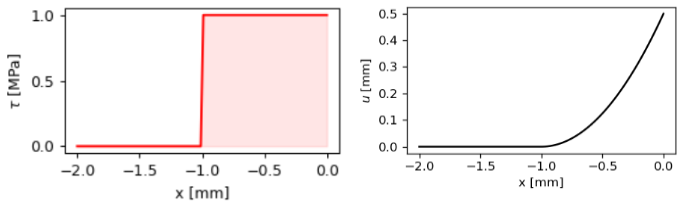

Since the debonding length directly represents the irreversible change of the material structure, the energy dissipation can be evaluated by integrating the dissipative term over the length $a$. The rest of the domain, i.e. the elastic bar and the intact part of the bond zone can be omitted from the dissipation integral as they do not contribute to energy dissipation. 

Thus, the integration domain $\Omega_\mathrm{diss}$ representing the dissipative part of the domain is equal to the debonded zone $x\in(a,0)$ in our case. The particular form of the integral directly delivering the energy dissipation then reads
\begin{align}
G &= p \int_{a}^{0} \tau s \; \mathrm{d} x \\
  &= p \int_{a}^{0} \bar{\tau} u_\mathrm{f} \; \mathrm{d} x
\end{align}

This integral expressed in `sympy` delivers the result

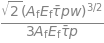

In [9]:
G_P_local = p * sp.integrate(tau * u_f_, (x,a_,0))

G_w_local = G_P_local.subs(P,P_w_) # substitute the pullout curve for P
G_w_local

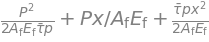

In [12]:
u_f_

By evaluating the dissipated energies evaluated globally and locally we find out that they are equivalent, i.e.

In [13]:
G_w_global - G_w_local

As we have already learned, materials exhibiting softening exhibit stress concentration within in a small volume of the material. This concentration is connected with local  inelastic effects of damage and plasticity that release energy. As a result, the energy dissipation of the whole structure can be evaluated by integration of the coupled stress and inelastic strain variables within a small volume of material. This concept constitutes the basis for an objective characterization of fracture. 

# **Graphical presentation of energetic response**

<div style="background-color:lightgray;text-align:left"> <img src="../icons/perform.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Let us make the formulas executable</b> </div> 
    
To see the correspondence between the stored and dissipated energy studied in the case of the pullout test, let us visualize the correspondence between the force displacement curves and the energy displacement curves. First, we transport the expressions for the pullout curve `P_w_`, total energy `W_w_`, stored energy `U_w_`, dissipated energy `G_w_` and the derivatives of the stored and dissipated energy with respect to the control displacement to executable functions named as `get_[function]`

In [14]:
get_G_w = sp.lambdify((w, E_f, A_f, p, tau), G_w_local)
get_U_w = sp.lambdify((w, E_f, A_f, p, tau), U_w_)
get_W_w = sp.lambdify((w, E_f, A_f, p, tau), W_w_)
get_P_w = sp.lambdify((w, E_f, A_f, p, tau), P_w_)
get_dot_U_w = sp.lambdify((w, E_f, A_f, p, tau), U_w_.diff(w))
get_dot_G_w = sp.lambdify((w, E_f, A_f, p, tau), G_w_local.diff(w))

<div style="background-color:lightgray;text-align:left"> <img src="../icons/view.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b></b>Visualization of energy profiles</div> 

Two graphs are produced to show the pullout curve and the corresponding energy profiles using the following code

In [15]:
fig, (ax_P, ax_E) = plt.subplots(1,2, figsize=(10,4))
fig.canvas.header_visible = False
w_range = np.linspace(1e-9,.1,100)
params = (210000, np.pi*8**2, np.pi*16, 10)
U_w_range = get_U_w(w_range, *params)
G_w_range = get_G_w(w_range, *params)
W_w_range = get_W_w(w_range, *params)
ax_E.plot(w_range, W_w_range, linestyle='dashed', color='black', lw=3, label=r'$\mathcal{W}$')
ax_E.plot(w_range, U_w_range, color='green', label=r'$\mathcal{U}$')
ax_E.fill_between(w_range, U_w_range, 0, color='green', alpha=0.3)
ax_E.plot(w_range, U_w_range+G_w_range, color='red', label=r'$G$')
ax_E.fill_between(w_range, U_w_range+G_w_range, U_w_range, color='red', alpha=0.3)
ax_E.set_xlabel(r'$w$ [mm]'); ax_E.set_ylabel(r'Energy [Nmm]')
ax_E.legend();
P_w_range = get_P_w(w_range, *params)
dot_G_w_range = get_dot_G_w(w_range, *params)
dot_U_w_range = get_dot_U_w(w_range, *params)
ax_P.plot(w_range, P_w_range, color='black', lw=3, label=r'$P = \dot{\mathcal{W}}$')
ax_P.fill_between(w_range, dot_U_w_range, 0, color='green', alpha=0.3, label=r'$\mathcal{U}$')
ax_P.fill_between(w_range, dot_U_w_range+dot_G_w_range, dot_U_w_range, color='red', alpha=0.3, label=r'$G$')
ax_P.set_xlabel(r'$w$ [mm]'); ax_P.set_ylabel(r'$P$ [N]')
ax_P.legend();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The left diagram shows the total energy $\mathcal{W}$ as the sum of the stored ($\mathcal{U}$) and dissipated ($G$) energies. The right diagram shows the pullout curve with the force decomposed into the part which is used for the storage of energy and the part that cannot be recovered.

As already mentioned above, in the present case of the pullout test with elastic fiber, frictional bond and rigid matrix, the amount of stored and dissipated energies is equivalent, i.e.
$$
G = \mathcal{U}
$$

<div style="background-color:lightgray;text-align:left"> <img src="../icons/takeaway.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b></b>Takeaways</div> 

 * Domains of a structure that unload or load elastically do not contribute to the energy dissipation
 * Energy dissipation can be evaluated locally only in those parts where irreversible changes in material structure occur
 * The more brittle material the smaller the dissipative zones within the volume of a structural member

<div style="background-color:lightgray;text-align:left"> <img src="../icons/next.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b></b>Behind the corner ...</div> 

Note that in the present frictional case, integration only over the debonded zone was needed.

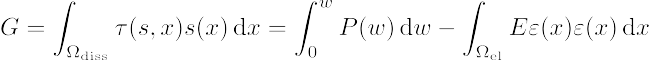

Consider other examples with a stress concentration and strain localization, e.g. a pullout test with bond softening, notched bending test or wedge splitting test.

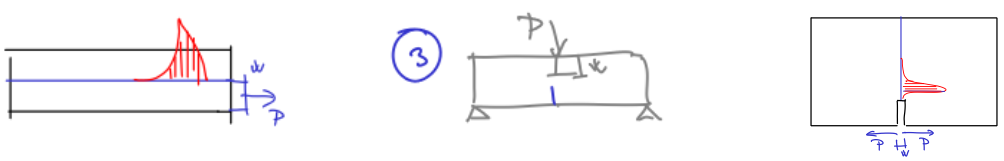

In these tests only a small zone contributes to energy dissipation. We shall illuminate this using the last example of a pullout test with softening behavior, now including the global evaluation of the energy dissipation. 

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour6_energy/6_1_energy_dissipation.ipynb#top">6.1 Energy games</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour6_energy/6_3_localized_energy_dissipation.ipynb#top">6.3 Softening and fracture energy</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 